# Crime in Boston

In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
import folium
from folium.plugins import HeatMap

In [2]:
# Define the path to the ZIP file and CSV file
zip_file_path = 'Crimes in Boston.zip'
csv_file_name = 'crime.csv'

# Extract and load the dataset
with zipfile.ZipFile(zip_file_path, 'r') as z:
    z.extract(csv_file_name)

try:
    data = pd.read_csv(csv_file_name, encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 encoding failed. Trying 'latin1' encoding...")
    data = pd.read_csv(csv_file_name, encoding='latin1')

# Inspect dataset
print("Dataset Overview:")
print(data.info())
print("\nFirst Few Rows:")
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum())

UTF-8 encoding failed. Trying 'latin1' encoding...


C:\Users\milto\AppData\Local\Temp\ipykernel_8336\869573034.py:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_name, encoding='latin1')


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15 

In [3]:
# Data Cleaning
data.dropna(subset=['Lat', 'Long', 'OCCURRED_ON_DATE'], inplace=True)
data['DISTRICT'].fillna('Unknown', inplace=True)
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'], errors='coerce')

# Extract additional time-based features
data['WEEK'] = data['OCCURRED_ON_DATE'].dt.isocalendar().week
data['DAY'] = data['OCCURRED_ON_DATE'].dt.day
data['HOUR'] = data['OCCURRED_ON_DATE'].dt.hour

# Verify cleaned dataset
print("\nCleaned Dataset Overview:")
print(data.info())

C:\Users\milto\AppData\Local\Temp\ipykernel_8336\1690262980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DISTRICT'].fillna('Unknown', inplace=True)



Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 307188 entries, 0 to 327819
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      307188 non-null  object        
 1   OFFENSE_CODE         307188 non-null  int64         
 2   OFFENSE_CODE_GROUP   307188 non-null  object        
 3   OFFENSE_DESCRIPTION  307188 non-null  object        
 4   DISTRICT             307188 non-null  object        
 5   REPORTING_AREA       307188 non-null  object        
 6   SHOOTING             1020 non-null    object        
 7   OCCURRED_ON_DATE     307188 non-null  datetime64[ns]
 8   YEAR                 307188 non-null  int64         
 9   MONTH                307188 non-null  int64         
 10  DAY_OF_WEEK          307188 non-null  object        
 11  HOUR                 307188 non-null  int32         
 12  UCR_PART             307095 non-null  object      

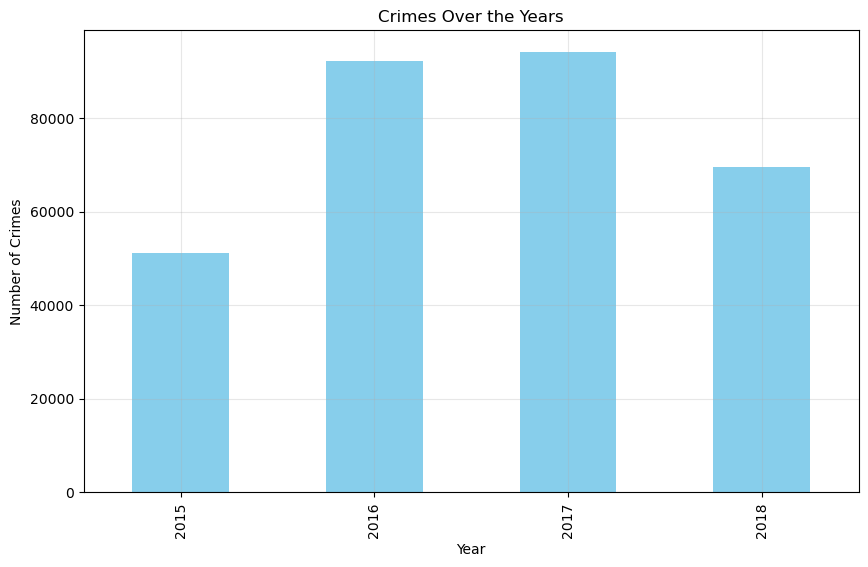

C:\Users\milto\AppData\Local\Temp\ipykernel_8336\605523423.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='HOUR', palette='viridis')


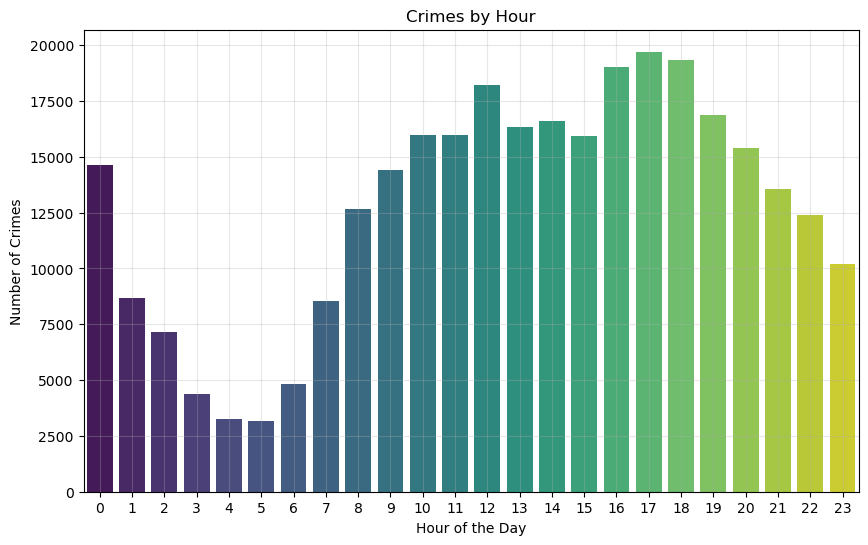

C:\Users\milto\AppData\Local\Temp\ipykernel_8336\605523423.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='DISTRICT', order=data['DISTRICT'].value_counts().index, palette='coolwarm')


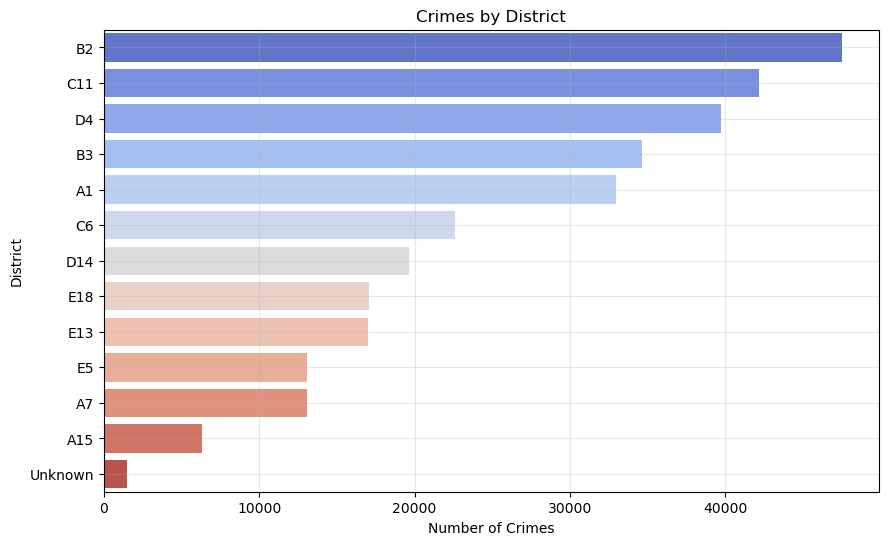

Heatmap saved as 'crime_heatmap.html'


C:\Users\milto\AppData\Local\Temp\ipykernel_8336\605523423.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='OFFENSE_CODE_GROUP',


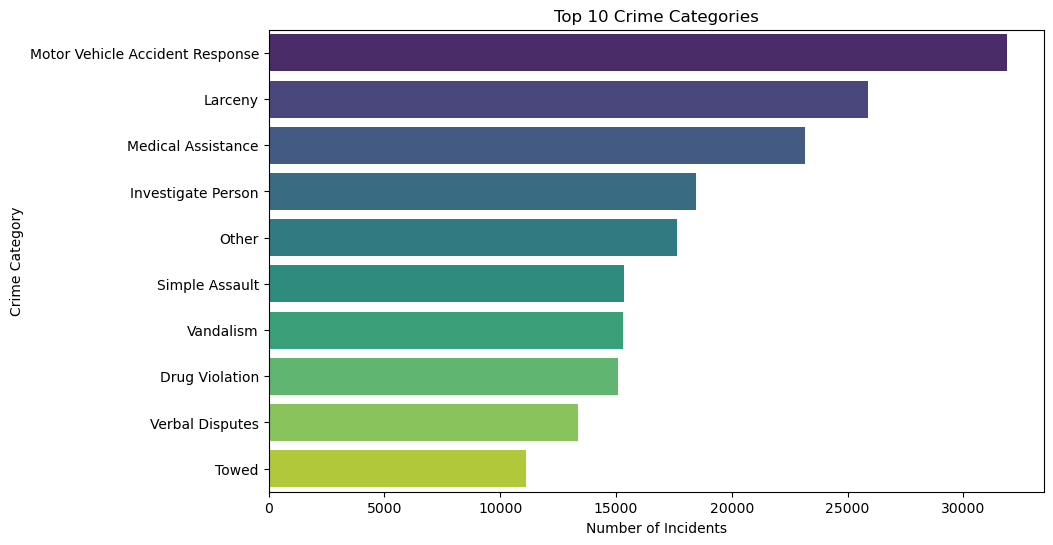

In [4]:
# Exploratory Data Analysis (EDA)

# Crimes Over the Years
plt.figure(figsize=(10, 6))
data.groupby('YEAR').size().plot(kind='bar', color='skyblue')
plt.title('Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(alpha=0.3)
plt.show()

# Crimes by Hour of the Day
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='HOUR', palette='viridis')
plt.title('Crimes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.grid(alpha=0.3)
plt.show()

# Crimes by District
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='DISTRICT', order=data['DISTRICT'].value_counts().index, palette='coolwarm')
plt.title('Crimes by District')
plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.grid(alpha=0.3)
plt.show()

# Heatmap of Crimes
crime_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
heat_data = data[['Lat', 'Long']].dropna()
HeatMap(heat_data).add_to(crime_map)
crime_map.save("crime_heatmap.html")
print("Heatmap saved as 'crime_heatmap.html'")

# Top 10 Crime Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='OFFENSE_CODE_GROUP', 
              order=data['OFFENSE_CODE_GROUP'].value_counts().index[:10], palette='viridis')
plt.title("Top 10 Crime Categories")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Category")
plt.show()

In [5]:
# Predictive Analysis: Crime Type
label_encoders = {}
categorical_columns = ['DAY_OF_WEEK', 'DISTRICT']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode target variable
data['OFFENSE_CODE_GROUP'] = LabelEncoder().fit_transform(data['OFFENSE_CODE_GROUP'])

features = ['HOUR', 'DAY', 'MONTH', 'DAY_OF_WEEK', 'DISTRICT', 'Lat', 'Long']
target = 'OFFENSE_CODE_GROUP'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nClassification Report for Crime Type Prediction:")
print(classification_report(y_test, y_pred))


Classification Report for Crime Type Prediction:


C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.06      0.04      0.05      2207
           1       0.67      0.50      0.57        12
           2       0.00      0.00      0.00        27
           3       0.38      0.39      0.39       277
           4       0.06      0.03      0.04      1409
           5       0.05      0.03      0.04       327
           6       0.01      0.00      0.00       296
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00         1
          10       0.13      0.06      0.08       391
          11       0.05      0.02      0.03       998
          12       0.06      0.03      0.04       440
          13       0.08      0.03      0.04        36
          14       0.07      0.06      0.07       685
          15       0.37      0.45      0.41      4545
          16       0.06      0.02      0.03        90
          17       0.00    

In [6]:
# Clustering for Crime Hotspots
crime_coords = data[['Lat', 'Long']].dropna()
crime_coords_sample = crime_coords.sample(10000, random_state=42)
crime_coords_scaled = StandardScaler().fit_transform(crime_coords_sample)

dbscan = DBSCAN(eps=0.01, min_samples=50).fit(crime_coords_scaled)
data['IS_HOTSPOT'] = 0
sample_index = crime_coords_sample.index
data.loc[sample_index, 'IS_HOTSPOT'] = (dbscan.labels_ != -1).astype(int)

print("\nHotspot Clustering Added to Data.")



Hotspot Clustering Added to Data.


In [7]:
# Predictive Analysis: District Crime Levels
crime_counts = data.groupby(['DISTRICT', 'YEAR', 'MONTH'])['INCIDENT_NUMBER'].count().reset_index()
crime_counts.rename(columns={'INCIDENT_NUMBER': 'CRIME_COUNT'}, inplace=True)
crime_counts['DISTRICT'] = LabelEncoder().fit_transform(crime_counts['DISTRICT'])

features = ['DISTRICT', 'YEAR', 'MONTH']
target = 'CRIME_COUNT'

X = crime_counts[features]
y = crime_counts[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error for District Crime Prediction: {mse}")



Mean Squared Error for District Crime Prediction: 13119.920231446538


In [10]:
# Predicting Crime Severity
# Predict whether a crime belongs to Part One, Part Two, or Part Three (UCR_PART).

# Encode target variable
data['UCR_PART'] = LabelEncoder().fit_transform(data['UCR_PART'].fillna('Unknown'))

# Features and target
features = ['OFFENSE_CODE_GROUP', 'HOUR', 'DAY', 'MONTH', 'YEAR', 'DISTRICT']
target = 'UCR_PART'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       388
           1       0.98      0.99      0.99     18118
           2       0.99      0.99      0.99     45497
           3       0.98      0.98      0.98     28123
           4       1.00      0.03      0.06        31

    accuracy                           0.99     92157
   macro avg       0.99      0.77      0.79     92157
weighted avg       0.99      0.99      0.99     92157



In [13]:
# Save cleaned dataset
data.to_csv('cleaned_crime_data.csv', index=False)
print("Cleaned data saved to 'cleaned_crime_data.csv'")

Cleaned data saved to 'cleaned_crime_data.csv'
